1. Setting Up the Environment

    libraries installed:
    TensorFlow,
    Numpy,
    Pandas,
    Matplotlib,
    Scikit-Learn,
    NLTK.

In [1]:
pip install tensorflow numpy pandas matplotlib scikit-learn nltk

  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 35.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 34.7 MB/s eta 0:00:001m32.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 41.8 MB/s eta 0:00:0031m49.4 MB/s eta 0:00:01
Using cached werkzeug-3.1.3-py3-none-any.whl (224 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21/21 [tensorflow]0m 20/21 [tensorflow]n]-pasta]ver]

[notice] A new 

2. Loading the Dataset



In [7]:
import pandas as pd
# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')
df.sample(5)

,review,sentiment
30597,This is my favorite of the three care bears mo...,positive
33134,"First off, I dislike almost all Neil Simon mov...",positive
25221,"Last night, I am sitting in my TV room, beer i...",negative
28947,Imagine the most depressing winter you will ne...,positive
20636,Brian De Palma's undeniable virtuosity can't r...,positive


3. Data Cleaning and Preprocessing

In [8]:
import re
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    return text.lower().strip()
# Clean the reviews
df['review'] = df['review'].apply(clean_text)

In [10]:
# Remove Stop Word using NLTK Library
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /home/raj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


4. Tokenization and Padding

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
# Padding
max_length = 200
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')


2025-05-21 16:16:21.139856: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-21 16:16:21.157483: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-21 16:16:21.254249: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-21 16:16:21.335900: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747869381.405347   52318 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747869381.43

5. Encoding Labels

In [12]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
X = padded_sequences
y = df['sentiment'].values


6. Splitting the Data

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


7. Building the LSTM Model

In [14]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=max_length),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/raj/Project/Text_Summerization_Project/textsummerization/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-05-21 16:18:34.499981: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


8. Training the Model

In [15]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 136s 135ms/step - accuracy: 0.5072 - loss: 0.6924 - val_accuracy: 0.5305 - val_loss: 0.6854
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 134s 134ms/step - accuracy: 0.5253 - loss: 0.6868 - val_accuracy: 0.5069 - val_loss: 0.6930
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 134s 134ms/step - accuracy: 0.4993 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 134s 134ms/step - accuracy: 0.5070 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 134s 134ms/step - accuracy: 0.5067 - loss: 0.6922 - val_accuracy: 0.5362 - val_loss: 0.6790
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 134s 134ms/step - accuracy: 0.5395 - loss: 0.6777 - val_accuracy: 0.5360 - val_loss: 0.6817
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 135s 135ms/step - accuracy: 0.6701 - loss: 0.5665 - val_accuracy: 0.8640 - val_loss: 0.3322
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 134s 134ms/step - ac

9. Evaluating the Model

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.8835 - loss: 0.3004
Test Accuracy: 0.88


10. Making Predictions

In [18]:
sample_reviews = [
    "I absolutely loved this movie! The plot was thrilling and the characters were so well developed.",
    "The film was a disaster. Poor acting and a predictable storyline."
]
sample_sequences = tokenizer.texts_to_sequences(sample_reviews)
sample_padded = pad_sequences(sample_sequences, maxlen=max_length)
predictions = model.predict(sample_padded)
print(["Positive" if prob > 0.5 else "Negative" for prob in predictions])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
['Negative', 'Negative']


11. Visualizing Model Performance

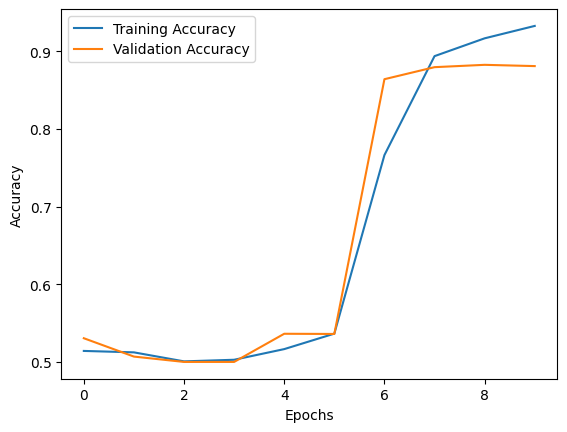

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()